**Сверточные нейронные сети (CNN)** долгое время были основой компьютерного зрения, эффективно справляясь с задачами классификации и детекции объектов. Однако у них есть свои ограничения:

*    Локальность обработки: При появлении архитектур, основанных на свертках свойство локальности позволяло учитывать отношения близости между соседними пикселями, но это и камень преткновения для дальнейшего улучшения архитектуры в связи с тем, что локальность обработки может затруднять понимание глобального контекста изображения.

*    Ограниченная интерпретируемость: Как и многие глубокие нейронные сети, CNN часто рассматриваются как "чёрные ящики". Понимание того, какие признаки влияют на принятие решений моделью, может быть затруднительным, что осложняет объяснение её поведения.


**Трансформеры** произвели революцию в обработке естественного языка благодаря механизму внимания, который позволяет моделям:

*    Фокусироваться на значимых частях текста: определять, какие слова важны для понимания контекста.

*    Учитывать дальние зависимости: понимать связи между словами, находящимися далеко друг от друга в тексте.


Позже идея была применена и к задачам компьютерного зрения - одним из удачных решений стал **ViT (Visual Transformer)**:

*    Разбиение изображения на патчи: вместо обработки всего изображения целиком, ViT делит его на небольшие фрагменты (патчи), например, размером 16x16 пикселей.

*    Преобразование патчей в эмбеддинги: каждый патч преобразуется в вектор фиксированной длины.

*    Добавление позиционного кодирования: поскольку трансформеры не учитывают порядок входных данных, добавляется информация о позиции каждого патча.

*    Применение механизма внимания: модель обучается определять, какие части изображения наиболее важны для выполнения конкретной задачи.

![](https://drive.google.com/uc?export=view&id=1whffN6x_HEYZN0nze5auo6fwk8TMapaN)

ViT обладает рядом преимуществ перед традиционными CNN:

*    Глобальное внимание: благодаря механизму внимания, ViT может одновременно учитывать информацию из разных частей изображения, что улучшает понимание глобального контекста.

*    Эффективность обучения: исследования показали, что ViT может достигать высоких результатов при меньших вычислительных затратах по сравнению с CNN.

Однако есть и минусы:

*    Требования к данным: для эффективного обучения ViT необходимы большие объемы данных.

*    Вычислительные ресурсы: несмотря на эффективность, обучение крупных моделей ViT все же требует значительных ресурсов.

*    Переобучение: трансформер, подобно зубрилке под одеялом в ночь перед экзаменом готов не выдержать и отвалиться, не дойдя до ваших заветных метрик, поэтому для решения данной задачи большое внимание придется уделить регуляризации и аугментации.

**Swin Transformer (Shifted Windows Transformer)** — это архитектура трансформера для компьютерного зрения, предложенная Microsoft в 2021 году.
Разработана как универсальная модель для задач компьютерного зрения: классификация, детекция объектов, сегментация, и т.д.

Ключевые особенности модели:

1.   **Локальные окна (window-based attention)**
2.   **Сдвинутые окна (Shifted Windows)**
3.   **Иерархическая структура**

![](https://drive.google.com/uc?export=view&id=1gDvYs4GhRNB0iPSIlOePqL3ymKPZCTYh)

Первый слой качественно такой же, как и в ViT-е — исходная картинка нарезается на патчи и проецируется линейным слоем. Единственное отличие в том, что в Swin-е на первом слое патчи имеют размер 4х4, что позволяет обрабатывать более мелкий контекст. Далее идут несколько Patch Merging и Swin Transformer Block слоёв.

![](https://drive.google.com/uc?export=view&id=1zZ7qWfLXak7F7L_-nP_wT1US6q8ftFwn)

Patch Merging занимается тем, что соединяет фичи соседних (в окне 2х2) токенов и понижает размерность, получая более высокоуровневое представление. Таким образом, после каждой стадии образуются «карты» признаков, содержащие информацию на разных пространственных масштабах, что как раз и позволяет получить иерархическое представление изображения, полезное для дальнейшей сегментации.

Благодаря этому Swin Transfomer может служить универсальным backbone-ом для различных задач компьютерного зрения.

Особенно интересно рассмотреть сам блок SWIN-Transformer, именно он и определяет всю архитектуру.

![](https://drive.google.com/uc?export=view&id=1hi7a-x53eJW7G849QmUic7cjrgv2UYnL)

Как видно из схемы, два последовательных блока представляют собой два классических трансформерных блока с MLP, LayerNorm-ами и Pre-Activation Residual-ами, однако Attention заменён на нечто более хитрое.

Проблемой Multi-Head Attention-а является его квадратичная сложность, больно стреляющая в ногу при применении на картинках высокого разрешения. На ум приходит довольно простое решение — давайте для каждого токена считать Attention не со всеми другими токенами, а только с находящимися в некотором окне фиксированного размера (Window Mutli-Head Attention). Если размерность токенов — C, а размер окна — MxM, то сложности для (Window) Multi-Head Self Attention-ов получаются следующие:

![](https://drive.google.com/uc?export=view&id=1O_sZD27zkVTOSzNxMRLNFmFZxYezigaB)

То есть Attention теперь работает за линейное по hw время! Однако такой подход уменьшает общую репрезентативную способность сети, так как токены из различных окон никак не будут взаимодействовать. Чтобы исправить ситуацию, авторы поступили любопытным образом. После каждого блока с Window Multi-Head Attention-ом они поставили аналогичный слой, со смещёнными по диагонали окнами Attention-а:

![](https://drive.google.com/uc?export=view&id=1DAhOXa0TcUhU6BNF61OUL_1Pf8T_FQJP)

Как проиллюстрировано выше, сдвиг окон Attention-а увеличивает их количество. Это значит, что реализация этого слоя с наивным паддингом исходной «карты» признаков нулями обяжет считать больше Attention-ов (9 вместо 4 в примере), чем мы посчитали бы без сдвига. Чтобы не производить лишних вычислений, авторы предложили перед подсчётом циклически сдвигать само изображение и вычислять уже маскированный Attention, чтобы исключить взаимодействие не соседних токенов. Такой подход вычислительно эффективнее наивного, так как количество считаемых Attention-ов не увеличивается:

![](https://drive.google.com/uc?export=view&id=1pfwgIZnXDaq6JtCAuKtKQlpJhIWLSYDD)

Это вернуло взаимодействие между токенами, оставив при этом линейную вычислительную сложность.

Также в Swin-е авторы использовали несколько другие positional embedding-и. Их заменили на обучаемую матрицу В, называемую relative position bias, которая прибавляется к произведению query и key под софтмаксом. Как оказалось, такой подод приводит к лучшему качеству.

**Итог**

В результате имеем следующее: авторам удалось несколько переформулировать трансформерную архитектуру под задачи CV, сделав её вычислительно более оптимальной за счёт использования локального Attention-а. При этом Shifted Window Multi-Head Attention оставил репрезентативную способность сети на уровне, достаточном, чтобы соревноваться с текущими сотовыми моделями. Благодаря этому стало возможным построить архитеткуру, позволяющую извлекать из изображений фичи на разных пространственных масштабах, что позволило успешно использовать Swin как backbone в задачах сегментации и детекции, где до этого трансформеры были на более низких позициях.

# **Сравнение моделей YOLOv12 и SWIN-Transformer**

In [ ]:
# Модели YOLO берем с официальной библиотеки раз
!pip install ultralytics

In [ ]:
# Берем размеченный датасет с сайта Roboflow для задачи классификации
%cd /content/
!rm -rf rooms

# Это датасет MIT Indoor Scene Recognition Computer Vision Project
# Содержит ~16_000 изображений с комнатами (10885 + 3128 + 1558)
!curl -L "https://universe.roboflow.com/ds/9R6CapuQoN?key=wGqBiYvEPE" > roboflow.zip; unzip roboflow.zip -d rooms; rm roboflow.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
 extracting: rooms/train/subway/subway_0154_jpg.rf.701487ba30f29b1afb3073358176c602.jpg  
 extracting: rooms/train/subway/subway_0155_jpg.rf.6a15c0222f818a466b99832df13fdff5.jpg  
 extracting: rooms/train/subway/subway_0156_jpg.rf.2d27951a903824f7ee92cc87a24d8820.jpg  
 extracting: rooms/train/subway/subway_0157_jpg.rf.3e9f1410a9ec78c600e3d95d9a61ac3b.jpg  
 extracting: rooms/train/subway/subway_0158_jpg.rf.be544976afb70d1bf66d38c9d959e148.jpg  
 extracting: rooms/train/subway/subway_0159_jpg.rf.c7f38751ba8656eaf4d17c80cea0c804.jpg  
 extracting: rooms/train/subway/subway_0160_jpg.rf.aee120c348a2847ac7f2b2bb54aadf83.jpg  
 extracting: rooms/train/subway/subway_0161_jpg.rf.d079fc85f3be9fdb2225937d5865f1f6.jpg  
 extracting: rooms/train/subway/subway_0162_jpg.rf.a9eebd18335605b23ddca656ce414bfe.jpg  
 extracting: rooms/train/subway/subway_0163_jpg.rf.c2da774e5c40cff884f176992bbd2943.jpg  
 extracting: rooms/train/subway/

In [ ]:
# Для модели YOLO по умолчанию нужно другое название папки для валидации

!cp -r /content/rooms/valid /content/rooms/val
!rm -rf /content/rooms/valid

# Классификация с использованием модели YOLOv12

In [ ]:
from ultralytics import YOLO

yolo12 = YOLO("yolo12n-cls.yaml")

# Размер изобржаения взят стандартным для SWIN, чтобы честно было
results = yolo12.train(data="/content/rooms", epochs=100, imgsz=224, pretrained=False, lr0=1e-4)

# Результаты обучения, валидации и теста автоматически сохраняются в runs/classify/train{num}

YOLO12n-cls summary: 152 layers, 1,820,976 parameters, 1,820,976 gradients, 3.7 GFLOPs
Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=classify, mode=train, model=yolo12n-cls.yaml, data=/content/rooms, epochs=100, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fals

train: Scanning /content/rooms/train... 10885 images, 0 corrupt: 100%|██████████| 10885/10885 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 595.1±325.0 MB/s, size: 30.4 KB)


val: Scanning /content/rooms/val... 3128 images, 0 corrupt: 100%|██████████| 3128/3128 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 58 weight(decay=0.0), 59 weight(decay=0.0005), 59 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 8 dataloader workers
Logging results to runs/classify/train7
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100      4.52G      4.095          5        224: 100%|██████████| 681/681 [00:47<00:00, 14.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 36.22it/s]

                   all    0.00256      0.039



      Epoch    GPU_mem       loss  Instances       Size


      2/100      4.52G      3.887          5        224: 100%|██████████| 681/681 [00:44<00:00, 15.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 36.50it/s]


                   all     0.0224      0.117

      Epoch    GPU_mem       loss  Instances       Size


      3/100      4.52G      3.714          5        224: 100%|██████████| 681/681 [00:42<00:00, 15.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 38.05it/s]

                   all    0.00543     0.0579



      Epoch    GPU_mem       loss  Instances       Size


      4/100      4.52G      3.524          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 36.84it/s]

                   all    0.00192     0.0981



      Epoch    GPU_mem       loss  Instances       Size


      5/100      4.52G        3.4          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 37.93it/s]

                   all     0.0221      0.118



      Epoch    GPU_mem       loss  Instances       Size


      6/100      4.52G       3.32          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 39.78it/s]

                   all     0.0326      0.138



      Epoch    GPU_mem       loss  Instances       Size


      7/100      4.52G      3.231          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 35.86it/s]

                   all     0.0112     0.0764



      Epoch    GPU_mem       loss  Instances       Size


      8/100      4.52G      3.149          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 37.69it/s]

                   all     0.0233      0.151



      Epoch    GPU_mem       loss  Instances       Size


      9/100      4.52G        3.1          5        224: 100%|██████████| 681/681 [00:43<00:00, 15.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 38.26it/s]

                   all     0.0253      0.133



      Epoch    GPU_mem       loss  Instances       Size


     10/100      4.52G      3.035          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 36.32it/s]

                   all    0.00959     0.0927



      Epoch    GPU_mem       loss  Instances       Size


     11/100      4.52G      2.937          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 37.24it/s]

                   all     0.0301      0.153



      Epoch    GPU_mem       loss  Instances       Size


     12/100      4.52G      2.838          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 39.51it/s]

                   all     0.0361      0.156



      Epoch    GPU_mem       loss  Instances       Size


     13/100      4.52G      2.764          5        224: 100%|██████████| 681/681 [00:42<00:00, 15.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 37.78it/s]

                   all     0.0332      0.147



      Epoch    GPU_mem       loss  Instances       Size


     14/100      4.52G      2.713          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 39.14it/s]

                   all     0.0556      0.192



      Epoch    GPU_mem       loss  Instances       Size


     15/100      4.52G      2.648          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 38.47it/s]

                   all     0.0409      0.158



      Epoch    GPU_mem       loss  Instances       Size


     16/100      4.52G      2.592          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 35.63it/s]

                   all     0.0419      0.169



      Epoch    GPU_mem       loss  Instances       Size


     17/100      4.52G       2.54          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 38.66it/s]

                   all     0.0396      0.165



      Epoch    GPU_mem       loss  Instances       Size


     18/100      4.52G      2.464          5        224: 100%|██████████| 681/681 [00:41<00:00, 16.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 36.40it/s]

                   all     0.0454      0.156



      Epoch    GPU_mem       loss  Instances       Size


     19/100      4.52G      2.456          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 37.45it/s]

                   all     0.0253      0.143



      Epoch    GPU_mem       loss  Instances       Size


     20/100      4.52G      2.408          5        224: 100%|██████████| 681/681 [00:42<00:00, 15.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 38.57it/s]

                   all     0.0345      0.142



      Epoch    GPU_mem       loss  Instances       Size


     21/100      4.52G      2.346          5        224: 100%|██████████| 681/681 [00:41<00:00, 16.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 35.85it/s]

                   all     0.0361      0.153



      Epoch    GPU_mem       loss  Instances       Size


     22/100      4.52G      2.303          5        224: 100%|██████████| 681/681 [00:42<00:00, 15.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 37.22it/s]

                   all     0.0521      0.171



      Epoch    GPU_mem       loss  Instances       Size


     23/100      4.52G      2.251          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 38.11it/s]

                   all     0.0377      0.156



      Epoch    GPU_mem       loss  Instances       Size


     24/100      4.52G       2.23          5        224: 100%|██████████| 681/681 [00:42<00:00, 15.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 34.98it/s]

                   all     0.0387      0.143



      Epoch    GPU_mem       loss  Instances       Size


     25/100      4.52G      2.183          5        224: 100%|██████████| 681/681 [00:42<00:00, 15.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 37.85it/s]

                   all     0.0403      0.166



      Epoch    GPU_mem       loss  Instances       Size


     26/100      4.52G      2.159          5        224: 100%|██████████| 681/681 [00:42<00:00, 15.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 40.00it/s]

                   all     0.0438      0.156



      Epoch    GPU_mem       loss  Instances       Size


     27/100      4.52G      2.105          5        224: 100%|██████████| 681/681 [00:42<00:00, 15.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 35.18it/s]

                   all     0.0467      0.143



      Epoch    GPU_mem       loss  Instances       Size


     28/100      4.52G      2.077          5        224: 100%|██████████| 681/681 [00:42<00:00, 15.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 39.74it/s]

                   all     0.0467      0.169



      Epoch    GPU_mem       loss  Instances       Size


     29/100      4.52G       2.06          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 40.17it/s]

                   all     0.0444      0.154



      Epoch    GPU_mem       loss  Instances       Size


     30/100      4.52G       2.03          5        224: 100%|██████████| 681/681 [00:42<00:00, 15.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 35.85it/s]

                   all      0.047      0.168



      Epoch    GPU_mem       loss  Instances       Size


     31/100      4.52G      1.975          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 41.05it/s]

                   all     0.0454      0.156



      Epoch    GPU_mem       loss  Instances       Size


     32/100      4.52G      1.962          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 40.02it/s]

                   all     0.0451      0.156



      Epoch    GPU_mem       loss  Instances       Size


     33/100      4.52G       1.94          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 38.18it/s]

                   all     0.0515      0.175



      Epoch    GPU_mem       loss  Instances       Size


     34/100      4.52G       1.91          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 38.75it/s]

                   all      0.046      0.167



      Epoch    GPU_mem       loss  Instances       Size


     35/100      4.52G      1.858          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 36.52it/s]

                   all     0.0527      0.162



      Epoch    GPU_mem       loss  Instances       Size


     36/100      4.52G      1.841          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 37.24it/s]

                   all     0.0467       0.16



      Epoch    GPU_mem       loss  Instances       Size


     37/100      4.52G      1.801          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 37.92it/s]

                   all     0.0508      0.167



      Epoch    GPU_mem       loss  Instances       Size


     38/100      4.52G      1.787          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 35.66it/s]

                   all     0.0521      0.176



      Epoch    GPU_mem       loss  Instances       Size


     39/100      4.52G      1.752          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 36.61it/s]

                   all     0.0496      0.155



      Epoch    GPU_mem       loss  Instances       Size


     40/100      4.52G       1.73          5        224: 100%|██████████| 681/681 [00:42<00:00, 15.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 37.79it/s]

                   all     0.0518      0.173



      Epoch    GPU_mem       loss  Instances       Size


     41/100      4.52G      1.717          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 36.95it/s]

                   all     0.0547      0.174



      Epoch    GPU_mem       loss  Instances       Size


     42/100      4.52G      1.686          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 38.34it/s]

                   all     0.0486      0.161



      Epoch    GPU_mem       loss  Instances       Size


     43/100      4.52G      1.672          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 37.23it/s]

                   all     0.0575      0.167



      Epoch    GPU_mem       loss  Instances       Size


     44/100      4.52G      1.619          5        224: 100%|██████████| 681/681 [00:43<00:00, 15.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 40.34it/s]

                   all     0.0527       0.16



      Epoch    GPU_mem       loss  Instances       Size


     45/100      4.52G       1.63          5        224: 100%|██████████| 681/681 [00:42<00:00, 15.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 35.72it/s]

                   all     0.0572      0.165



      Epoch    GPU_mem       loss  Instances       Size


     46/100      4.52G      1.575          5        224: 100%|██████████| 681/681 [00:42<00:00, 15.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 40.03it/s]

                   all     0.0531      0.166



      Epoch    GPU_mem       loss  Instances       Size


     47/100      4.52G      1.561          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 36.56it/s]

                   all     0.0563      0.174



      Epoch    GPU_mem       loss  Instances       Size


     48/100      4.52G      1.541          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 37.16it/s]

                   all     0.0556      0.173



      Epoch    GPU_mem       loss  Instances       Size


     49/100      4.52G       1.51          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 39.60it/s]

                   all     0.0582      0.169



      Epoch    GPU_mem       loss  Instances       Size


     50/100      4.52G      1.495          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 38.55it/s]

                   all     0.0582      0.179



      Epoch    GPU_mem       loss  Instances       Size


     51/100      4.52G      1.467          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 37.31it/s]

                   all     0.0582      0.181



      Epoch    GPU_mem       loss  Instances       Size


     52/100      4.52G      1.422          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 36.76it/s]

                   all     0.0534      0.182



      Epoch    GPU_mem       loss  Instances       Size


     53/100      4.52G      1.431          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 39.95it/s]

                   all     0.0534      0.171



      Epoch    GPU_mem       loss  Instances       Size


     54/100      4.52G      1.398          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 35.83it/s]

                   all     0.0585      0.177



      Epoch    GPU_mem       loss  Instances       Size


     55/100      4.52G      1.414          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 38.69it/s]

                   all     0.0604      0.172



      Epoch    GPU_mem       loss  Instances       Size


     56/100      4.52G      1.373          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 37.56it/s]

                   all     0.0601      0.175



      Epoch    GPU_mem       loss  Instances       Size


     57/100      4.52G      1.366          5        224: 100%|██████████| 681/681 [00:41<00:00, 16.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 36.67it/s]

                   all     0.0617      0.181



      Epoch    GPU_mem       loss  Instances       Size


     58/100      4.52G      1.309          5        224: 100%|██████████| 681/681 [00:42<00:00, 15.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 38.51it/s]

                   all      0.063       0.18



      Epoch    GPU_mem       loss  Instances       Size


     59/100      4.52G      1.301          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 38.12it/s]

                   all     0.0627       0.18



      Epoch    GPU_mem       loss  Instances       Size


     60/100      4.52G      1.275          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 35.76it/s]

                   all      0.063      0.182



      Epoch    GPU_mem       loss  Instances       Size


     61/100      4.52G      1.258          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 39.08it/s]

                   all     0.0617       0.18



      Epoch    GPU_mem       loss  Instances       Size


     62/100      4.52G      1.255          5        224: 100%|██████████| 681/681 [00:42<00:00, 15.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 38.27it/s]

                   all     0.0639       0.18



      Epoch    GPU_mem       loss  Instances       Size


     63/100      4.52G      1.232          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 36.37it/s]

                   all     0.0611      0.184



      Epoch    GPU_mem       loss  Instances       Size


     64/100      4.52G      1.183          5        224: 100%|██████████| 681/681 [00:42<00:00, 15.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 38.90it/s]

                   all      0.063      0.184



      Epoch    GPU_mem       loss  Instances       Size


     65/100      4.52G      1.171          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 38.47it/s]

                   all     0.0627      0.182



      Epoch    GPU_mem       loss  Instances       Size


     66/100      4.52G      1.155          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 34.29it/s]

                   all      0.062      0.177



      Epoch    GPU_mem       loss  Instances       Size


     67/100      4.52G       1.15          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 38.47it/s]


                   all      0.063      0.182

      Epoch    GPU_mem       loss  Instances       Size


     68/100      4.52G      1.115          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 36.38it/s]

                   all      0.062      0.181



      Epoch    GPU_mem       loss  Instances       Size


     69/100      4.52G      1.096          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 35.54it/s]

                   all     0.0646      0.184



      Epoch    GPU_mem       loss  Instances       Size


     70/100      4.52G       1.08          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 38.10it/s]

                   all     0.0671      0.184



      Epoch    GPU_mem       loss  Instances       Size


     71/100      4.52G      1.064          5        224: 100%|██████████| 681/681 [00:42<00:00, 15.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 38.08it/s]

                   all     0.0684      0.181



      Epoch    GPU_mem       loss  Instances       Size


     72/100      4.52G      1.027          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 36.27it/s]

                   all     0.0681       0.18



      Epoch    GPU_mem       loss  Instances       Size


     73/100      4.52G      1.036          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 39.66it/s]

                   all     0.0659       0.18



      Epoch    GPU_mem       loss  Instances       Size


     74/100      4.52G     0.9989          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 36.95it/s]

                   all     0.0662      0.182



      Epoch    GPU_mem       loss  Instances       Size


     75/100      4.52G     0.9868          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 36.86it/s]


                   all     0.0668      0.178

      Epoch    GPU_mem       loss  Instances       Size


     76/100      4.52G     0.9677          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 38.04it/s]

                   all     0.0675      0.178



      Epoch    GPU_mem       loss  Instances       Size


     77/100      4.52G       0.93          5        224: 100%|██████████| 681/681 [00:42<00:00, 15.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 39.20it/s]

                   all     0.0665       0.18



      Epoch    GPU_mem       loss  Instances       Size


     78/100      4.52G     0.9288          5        224: 100%|██████████| 681/681 [00:42<00:00, 15.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 37.72it/s]

                   all     0.0665       0.18



      Epoch    GPU_mem       loss  Instances       Size


     79/100      4.52G     0.9069          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 38.04it/s]

                   all     0.0659      0.182



      Epoch    GPU_mem       loss  Instances       Size


     80/100      4.52G     0.8809          5        224: 100%|██████████| 681/681 [00:43<00:00, 15.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 39.22it/s]

                   all     0.0659      0.183



      Epoch    GPU_mem       loss  Instances       Size


     81/100      4.52G     0.8695          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 40.73it/s]

                   all     0.0655      0.183



      Epoch    GPU_mem       loss  Instances       Size


     82/100      4.52G     0.8466          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 38.53it/s]

                   all     0.0662      0.183



      Epoch    GPU_mem       loss  Instances       Size


     83/100      4.52G     0.8158          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 40.41it/s]

                   all     0.0662      0.182



      Epoch    GPU_mem       loss  Instances       Size


     84/100      4.52G     0.8365          5        224: 100%|██████████| 681/681 [00:42<00:00, 15.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 38.75it/s]

                   all     0.0671      0.184



      Epoch    GPU_mem       loss  Instances       Size


     85/100      4.52G     0.7895          5        224: 100%|██████████| 681/681 [00:42<00:00, 15.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 36.26it/s]

                   all     0.0665      0.184



      Epoch    GPU_mem       loss  Instances       Size


     86/100      4.52G     0.7902          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 36.80it/s]

                   all     0.0665      0.184



      Epoch    GPU_mem       loss  Instances       Size


     87/100      4.52G     0.7566          5        224: 100%|██████████| 681/681 [00:42<00:00, 15.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 39.60it/s]

                   all     0.0665      0.184



      Epoch    GPU_mem       loss  Instances       Size


     88/100      4.52G     0.7528          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 36.13it/s]

                   all     0.0662      0.184



      Epoch    GPU_mem       loss  Instances       Size


     89/100      4.52G     0.7192          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 37.72it/s]

                   all     0.0665      0.184



      Epoch    GPU_mem       loss  Instances       Size


     90/100      4.52G     0.6976          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 37.31it/s]

                   all     0.0665      0.183



      Epoch    GPU_mem       loss  Instances       Size


     91/100      4.52G     0.6903          5        224: 100%|██████████| 681/681 [00:42<00:00, 15.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 35.39it/s]

                   all     0.0668      0.182



      Epoch    GPU_mem       loss  Instances       Size


     92/100      4.52G     0.6731          5        224: 100%|██████████| 681/681 [00:42<00:00, 15.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 38.52it/s]

                   all     0.0668      0.182



      Epoch    GPU_mem       loss  Instances       Size


     93/100      4.52G     0.6683          5        224: 100%|██████████| 681/681 [00:42<00:00, 15.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 40.28it/s]

                   all     0.0662      0.182



      Epoch    GPU_mem       loss  Instances       Size


     94/100      4.52G     0.6587          5        224: 100%|██████████| 681/681 [00:42<00:00, 15.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 38.21it/s]


                   all     0.0665      0.182

      Epoch    GPU_mem       loss  Instances       Size


     95/100      4.52G     0.6287          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 36.53it/s]

                   all     0.0662      0.181



      Epoch    GPU_mem       loss  Instances       Size


     96/100      4.52G     0.6088          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 41.27it/s]

                   all     0.0659      0.183



      Epoch    GPU_mem       loss  Instances       Size


     97/100      4.52G     0.6202          5        224: 100%|██████████| 681/681 [00:42<00:00, 15.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 35.71it/s]

                   all     0.0662      0.184



      Epoch    GPU_mem       loss  Instances       Size


     98/100      4.52G     0.5965          5        224: 100%|██████████| 681/681 [00:42<00:00, 15.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 37.55it/s]

                   all     0.0662      0.183



      Epoch    GPU_mem       loss  Instances       Size


     99/100      4.52G     0.5825          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 41.15it/s]

                   all     0.0652      0.183



      Epoch    GPU_mem       loss  Instances       Size


    100/100      4.52G     0.5783          5        224: 100%|██████████| 681/681 [00:42<00:00, 16.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 35.43it/s]

                   all     0.0652      0.183



100 epochs completed in 1.260 hours.
Optimizer stripped from runs/classify/train7/weights/last.pt, 3.8MB
Optimizer stripped from runs/classify/train7/weights/best.pt, 3.8MB

Validating runs/classify/train7/weights/best.pt...
Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO12n-cls summary (fused): 94 layers, 1,806,792 parameters, 0 gradients, 4.6 GFLOPs
train: /content/rooms/train... found 10885 images in 64 classes ✅ 
val: /content/rooms/val... found 3128 images in 21 classes: ERROR ❌️ requires 64 classes, not 21
test: /content/rooms/test... found 1558 images in 51 classes: ERROR ❌️ requires 64 classes, not 51


               classes   top1_acc   top5_acc: 100%|██████████| 98/98 [00:02<00:00, 40.80it/s]


                   all     0.0671      0.184
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train7


# Классификация с использованием модели SWIN-Transformer

In [ ]:
!pip install timm

In [ ]:
import os
import timm
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torch import nn, optim
from tqdm import tqdm

In [ ]:
train_dir = '/content/rooms/train'
val_dir = '/content/rooms/val'

# Преобразование входных изображений для SWIN-Transformer
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3),
])

transform_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3),
])

train_dataset = ImageFolder(train_dir, transform=transform_train)
val_dataset = ImageFolder(val_dir, transform=transform_val)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=8)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=8)

num_classes_val = len(val_dataset.classes)
num_classes = len(train_dataset.classes)

# Размер датасета
print(f"Количество изображений в трейне: {len(train_dataset)}")
print(f"Количество классов в трейне: {num_classes}")

print(f"Количество изображений на валидации: {len(val_dataset)}")
print(f"Количество классов на валидации: {num_classes_val}")

Количество изображений в трейне: 10885
Количество классов в трейне: 64
Количество изображений на валидации: 3128
Количество классов на валидации: 21


# Самая маленькая модель - SWIN-t (tiny)

In [ ]:
# Попробуем использовать необученную модель SWIN-t с такими же параметрами как и YOLO
model = timm.create_model('swin_tiny_patch4_window7_224', pretrained=False, num_classes=num_classes, batch_size=16)
model = model.to('cuda' if torch.cuda.is_available() else 'cpu')

# Реализация обучения без особой настройки
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4)

# Лучше использовать GPU для ускорения
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Учимся
epochs = 100
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for inputs, labels in tqdm(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1} - Loss: {total_loss/len(train_loader):.4f}")


100%|██████████| 681/681 [00:44<00:00, 15.45it/s]


Epoch 1 - Loss: 3.7560


100%|██████████| 681/681 [00:43<00:00, 15.62it/s]


Epoch 2 - Loss: 3.5646


100%|██████████| 681/681 [00:43<00:00, 15.66it/s]


Epoch 3 - Loss: 3.3103


100%|██████████| 681/681 [00:43<00:00, 15.72it/s]


Epoch 4 - Loss: 3.1241


100%|██████████| 681/681 [00:43<00:00, 15.72it/s]


Epoch 5 - Loss: 2.9560


100%|██████████| 681/681 [00:43<00:00, 15.57it/s]


Epoch 6 - Loss: 2.8143


100%|██████████| 681/681 [00:43<00:00, 15.64it/s]


Epoch 7 - Loss: 2.6712


100%|██████████| 681/681 [00:43<00:00, 15.73it/s]


Epoch 8 - Loss: 2.5484


100%|██████████| 681/681 [00:44<00:00, 15.42it/s]


Epoch 9 - Loss: 2.4218


100%|██████████| 681/681 [00:43<00:00, 15.61it/s]


Epoch 10 - Loss: 2.3025


100%|██████████| 681/681 [00:43<00:00, 15.50it/s]


Epoch 11 - Loss: 2.1697


100%|██████████| 681/681 [00:43<00:00, 15.57it/s]


Epoch 12 - Loss: 2.0243


100%|██████████| 681/681 [00:43<00:00, 15.51it/s]


Epoch 13 - Loss: 1.9096


100%|██████████| 681/681 [00:44<00:00, 15.46it/s]


Epoch 14 - Loss: 1.7934


100%|██████████| 681/681 [00:43<00:00, 15.48it/s]


Epoch 15 - Loss: 1.6525


100%|██████████| 681/681 [00:43<00:00, 15.54it/s]


Epoch 16 - Loss: 1.5111


100%|██████████| 681/681 [00:43<00:00, 15.62it/s]


Epoch 17 - Loss: 1.3948


100%|██████████| 681/681 [00:43<00:00, 15.57it/s]


Epoch 18 - Loss: 1.2784


100%|██████████| 681/681 [00:44<00:00, 15.42it/s]


Epoch 19 - Loss: 1.1598


100%|██████████| 681/681 [00:43<00:00, 15.63it/s]


Epoch 20 - Loss: 1.0334


100%|██████████| 681/681 [00:43<00:00, 15.64it/s]


Epoch 21 - Loss: 0.9165


100%|██████████| 681/681 [00:43<00:00, 15.58it/s]


Epoch 22 - Loss: 0.8296


100%|██████████| 681/681 [00:43<00:00, 15.59it/s]


Epoch 23 - Loss: 0.7062


100%|██████████| 681/681 [00:43<00:00, 15.53it/s]


Epoch 24 - Loss: 0.6495


100%|██████████| 681/681 [00:43<00:00, 15.61it/s]


Epoch 25 - Loss: 0.5727


100%|██████████| 681/681 [00:44<00:00, 15.39it/s]


Epoch 26 - Loss: 0.5058


100%|██████████| 681/681 [00:43<00:00, 15.51it/s]


Epoch 27 - Loss: 0.4789


100%|██████████| 681/681 [00:44<00:00, 15.37it/s]


Epoch 28 - Loss: 0.4302


100%|██████████| 681/681 [00:44<00:00, 15.36it/s]


Epoch 29 - Loss: 0.4030


100%|██████████| 681/681 [00:44<00:00, 15.34it/s]


Epoch 30 - Loss: 0.3810


100%|██████████| 681/681 [00:44<00:00, 15.43it/s]


Epoch 31 - Loss: 0.3798


100%|██████████| 681/681 [00:43<00:00, 15.60it/s]


Epoch 32 - Loss: 0.3521


100%|██████████| 681/681 [00:43<00:00, 15.62it/s]


Epoch 33 - Loss: 0.3142


100%|██████████| 681/681 [00:43<00:00, 15.52it/s]


Epoch 34 - Loss: 0.3053


100%|██████████| 681/681 [00:44<00:00, 15.41it/s]


Epoch 35 - Loss: 0.3157


100%|██████████| 681/681 [00:43<00:00, 15.54it/s]


Epoch 36 - Loss: 0.2842


100%|██████████| 681/681 [00:43<00:00, 15.61it/s]


Epoch 37 - Loss: 0.2646


100%|██████████| 681/681 [00:43<00:00, 15.57it/s]


Epoch 38 - Loss: 0.2776


100%|██████████| 681/681 [00:43<00:00, 15.56it/s]


Epoch 39 - Loss: 0.2391


100%|██████████| 681/681 [00:43<00:00, 15.57it/s]


Epoch 40 - Loss: 0.2784


100%|██████████| 681/681 [00:43<00:00, 15.55it/s]


Epoch 41 - Loss: 0.2564


100%|██████████| 681/681 [00:43<00:00, 15.60it/s]


Epoch 42 - Loss: 0.2509


100%|██████████| 681/681 [00:43<00:00, 15.54it/s]


Epoch 43 - Loss: 0.2413


100%|██████████| 681/681 [00:43<00:00, 15.55it/s]


Epoch 44 - Loss: 0.2148


100%|██████████| 681/681 [00:43<00:00, 15.65it/s]


Epoch 45 - Loss: 0.2202


100%|██████████| 681/681 [00:43<00:00, 15.55it/s]


Epoch 46 - Loss: 0.2051


100%|██████████| 681/681 [00:43<00:00, 15.73it/s]


Epoch 47 - Loss: 0.2082


100%|██████████| 681/681 [00:43<00:00, 15.62it/s]


Epoch 48 - Loss: 0.2078


100%|██████████| 681/681 [00:43<00:00, 15.51it/s]


Epoch 49 - Loss: 0.2071


100%|██████████| 681/681 [00:43<00:00, 15.54it/s]


Epoch 50 - Loss: 0.1935


100%|██████████| 681/681 [00:43<00:00, 15.61it/s]


Epoch 51 - Loss: 0.2018


100%|██████████| 681/681 [00:43<00:00, 15.59it/s]


Epoch 52 - Loss: 0.1852


100%|██████████| 681/681 [00:43<00:00, 15.59it/s]


Epoch 53 - Loss: 0.1838


100%|██████████| 681/681 [00:43<00:00, 15.69it/s]


Epoch 54 - Loss: 0.2023


100%|██████████| 681/681 [00:43<00:00, 15.62it/s]


Epoch 55 - Loss: 0.1852


100%|██████████| 681/681 [00:43<00:00, 15.59it/s]


Epoch 56 - Loss: 0.1773


100%|██████████| 681/681 [00:43<00:00, 15.63it/s]


Epoch 57 - Loss: 0.1713


100%|██████████| 681/681 [00:43<00:00, 15.64it/s]


Epoch 58 - Loss: 0.1632


100%|██████████| 681/681 [00:43<00:00, 15.50it/s]


Epoch 59 - Loss: 0.1817


100%|██████████| 681/681 [00:43<00:00, 15.55it/s]


Epoch 60 - Loss: 0.1685


100%|██████████| 681/681 [00:43<00:00, 15.60it/s]


Epoch 61 - Loss: 0.1633


100%|██████████| 681/681 [00:43<00:00, 15.60it/s]


Epoch 62 - Loss: 0.1653


100%|██████████| 681/681 [00:43<00:00, 15.65it/s]


Epoch 63 - Loss: 0.1365


100%|██████████| 681/681 [00:43<00:00, 15.63it/s]


Epoch 64 - Loss: 0.1667


100%|██████████| 681/681 [00:43<00:00, 15.63it/s]


Epoch 65 - Loss: 0.1554


100%|██████████| 681/681 [00:43<00:00, 15.57it/s]


Epoch 66 - Loss: 0.1458


100%|██████████| 681/681 [00:43<00:00, 15.56it/s]


Epoch 67 - Loss: 0.1569


100%|██████████| 681/681 [00:43<00:00, 15.64it/s]


Epoch 68 - Loss: 0.1366


100%|██████████| 681/681 [00:43<00:00, 15.57it/s]


Epoch 69 - Loss: 0.1324


100%|██████████| 681/681 [00:43<00:00, 15.55it/s]


Epoch 70 - Loss: 0.1402


100%|██████████| 681/681 [00:43<00:00, 15.54it/s]


Epoch 71 - Loss: 0.1520


100%|██████████| 681/681 [00:43<00:00, 15.57it/s]


Epoch 72 - Loss: 0.1331


100%|██████████| 681/681 [00:43<00:00, 15.64it/s]


Epoch 73 - Loss: 0.1338


100%|██████████| 681/681 [00:43<00:00, 15.57it/s]


Epoch 74 - Loss: 0.1466


100%|██████████| 681/681 [00:43<00:00, 15.63it/s]


Epoch 75 - Loss: 0.1164


100%|██████████| 681/681 [00:43<00:00, 15.61it/s]


Epoch 76 - Loss: 0.1346


100%|██████████| 681/681 [00:43<00:00, 15.57it/s]


Epoch 77 - Loss: 0.1369


100%|██████████| 681/681 [00:43<00:00, 15.65it/s]


Epoch 78 - Loss: 0.1296


100%|██████████| 681/681 [00:43<00:00, 15.74it/s]


Epoch 79 - Loss: 0.1378


100%|██████████| 681/681 [00:43<00:00, 15.61it/s]


Epoch 80 - Loss: 0.1086


100%|██████████| 681/681 [00:43<00:00, 15.59it/s]


Epoch 81 - Loss: 0.1209


100%|██████████| 681/681 [00:43<00:00, 15.63it/s]


Epoch 82 - Loss: 0.1294


100%|██████████| 681/681 [00:43<00:00, 15.70it/s]


Epoch 83 - Loss: 0.1200


100%|██████████| 681/681 [00:43<00:00, 15.65it/s]


Epoch 84 - Loss: 0.1340


100%|██████████| 681/681 [00:43<00:00, 15.64it/s]


Epoch 85 - Loss: 0.1124


100%|██████████| 681/681 [00:43<00:00, 15.60it/s]


Epoch 86 - Loss: 0.1055


100%|██████████| 681/681 [00:43<00:00, 15.60it/s]


Epoch 87 - Loss: 0.1146


100%|██████████| 681/681 [00:44<00:00, 15.47it/s]


Epoch 88 - Loss: 0.1103


100%|██████████| 681/681 [00:43<00:00, 15.56it/s]


Epoch 89 - Loss: 0.1180


100%|██████████| 681/681 [00:43<00:00, 15.60it/s]


Epoch 90 - Loss: 0.1005


100%|██████████| 681/681 [00:43<00:00, 15.57it/s]


Epoch 91 - Loss: 0.1136


100%|██████████| 681/681 [00:43<00:00, 15.66it/s]


Epoch 92 - Loss: 0.1251


100%|██████████| 681/681 [00:43<00:00, 15.54it/s]


Epoch 93 - Loss: 0.0990


100%|██████████| 681/681 [00:43<00:00, 15.68it/s]


Epoch 94 - Loss: 0.1135


100%|██████████| 681/681 [00:43<00:00, 15.58it/s]


Epoch 95 - Loss: 0.1055


100%|██████████| 681/681 [00:43<00:00, 15.59it/s]


Epoch 96 - Loss: 0.1012


100%|██████████| 681/681 [00:43<00:00, 15.54it/s]


Epoch 97 - Loss: 0.0999


100%|██████████| 681/681 [00:43<00:00, 15.65it/s]


Epoch 98 - Loss: 0.1063


100%|██████████| 681/681 [00:43<00:00, 15.66it/s]


Epoch 99 - Loss: 0.0980


100%|██████████| 681/681 [00:43<00:00, 15.54it/s]


Epoch 100 - Loss: 0.1090


In [ ]:
# Модель не запускается на валидации автоматически, поэтому делаем ручками
torch.save(model.state_dict(), 'swin_model.pth')

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Top-1 accuracy
print(f"Validation Accuracy: {100 * correct / total:.2f}%")

Validation Accuracy: 4.80%


Отчет (по реально представленным классам):
                precision    recall  f1-score   support

airport_inside       0.76      0.32      0.45       280
     artstudio       0.17      0.01      0.02        99
    auditorium       1.00      0.01      0.01       167
        bakery       1.00      0.00      0.00       401
           bar       0.41      0.08      0.14       603
      bathroom       0.02      0.01      0.01       197
       bedroom       0.02      0.00      0.00       653
     bookstore       0.02      0.04      0.03       141
       bowling       0.00      0.00      0.00        60
        buffet       0.00      0.00      0.00        27
        casino       0.00      0.00      0.00       143
 children_room       0.00      0.00      0.00        29
 church_inside       0.00      0.00      0.00        58
     classroom       0.00      0.00      0.00        28
      cloister       0.00      0.00      0.00         3
        closet       0.00      0.00      0.00         5
 clo

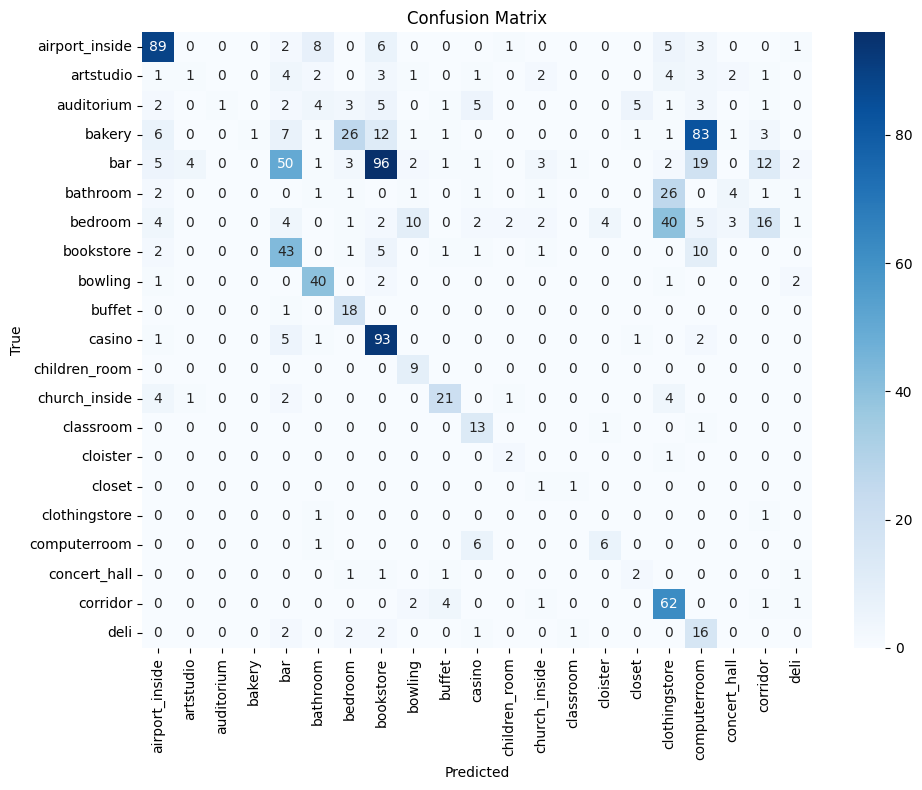

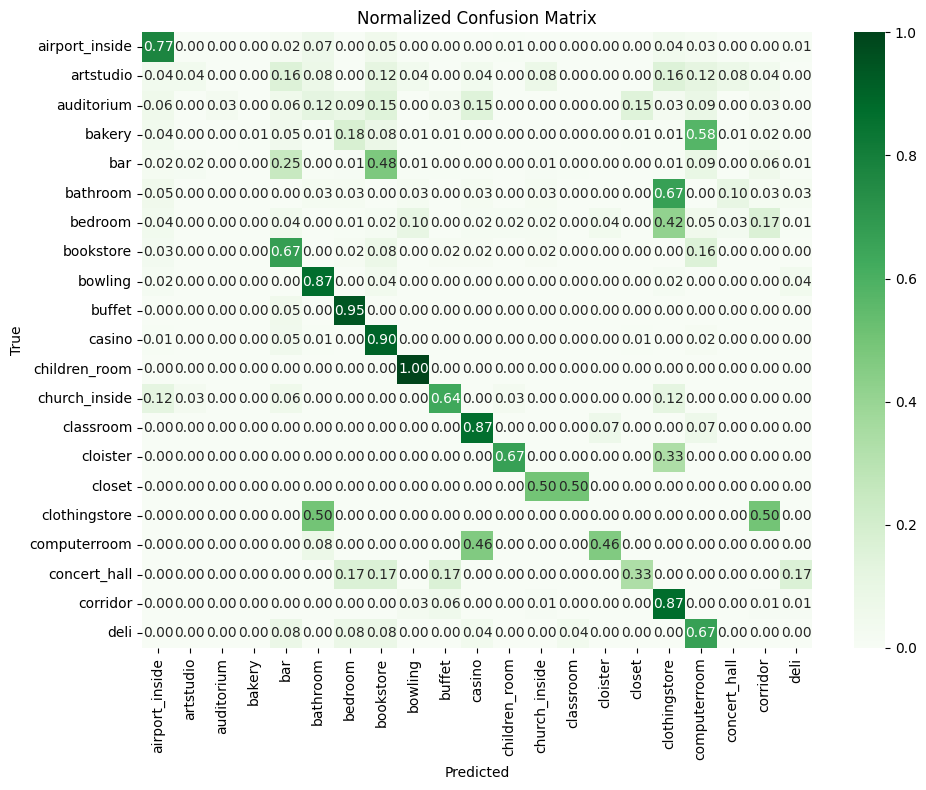

Top-1 Accuracy: 0.0480
Top-5 Accuracy: 0.1618


In [ ]:
# Для сравнения можно посмотреть на другие показатели

import torch
from torchvision import datasets, transforms
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Загружаем данные для валидации
dataset = datasets.ImageFolder(val_dir, transform=transform_val)
loader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=False)
class_names = dataset.classes  # всего 61 класс

# Предсказываем
model.eval()
all_preds = []
all_labels = []
top5_correct = 0
total_samples = 0

with torch.no_grad():
    for images, labels in loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)

        # Top-1
        preds = outputs.argmax(dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        # Top-5
        top5 = torch.topk(outputs, k=5, dim=1).indices
        for i in range(labels.size(0)):
            if labels[i] in top5[i]:
                top5_correct += 1
        total_samples += labels.size(0)

# Уникальные классы, которые реально есть в валидации
unique_classes = sorted(set(all_labels))
filtered_class_names = [class_names[i] for i in unique_classes]

# Отчет
print("Отчет (по реально представленным классам):")
print(classification_report(
    all_labels, all_preds,
    labels=unique_classes,
    target_names=filtered_class_names
))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds, labels=unique_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=filtered_class_names, yticklabels=filtered_class_names, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Confusion Matrix (нормализованная по строкам)
cm_normalized = confusion_matrix(all_labels, all_preds, labels=unique_classes, normalize='true')

plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', xticklabels=filtered_class_names, yticklabels=filtered_class_names, cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Normalized Confusion Matrix")
plt.tight_layout()
plt.show()

# Accuracy
top1_accuracy = np.mean(np.array(all_preds) == np.array(all_labels))
top5_accuracy = top5_correct / total_samples

print(f"Top-1 Accuracy: {top1_accuracy:.4f}")
print(f"Top-5 Accuracy: {top5_accuracy:.4f}")


# Размеченный датасет для задачи детекции - не получилось(((

In [ ]:
%cd /content

!rm -rf pascal_yolo
!curl -L "https://universe.roboflow.com/ds/EWMHvRtRpx?key=nPYKxlqECJ" > roboflow.zip; unzip roboflow.zip -d pascal_yolo; rm roboflow.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
 extracting: pascal_yolo/valid/images/2010_002589_jpg.rf.9532c36b5848297d781ead072f9d7802.jpg  
 extracting: pascal_yolo/valid/images/2010_002605_jpg.rf.2390501c41d5c1e941ff5ac119e00a7d.jpg  
 extracting: pascal_yolo/valid/images/2010_002615_jpg.rf.a76fdc38f443156d16291d7b2df553a1.jpg  
 extracting: pascal_yolo/valid/images/2010_002620_jpg.rf.094dcfa25d6cc9ec286a2ca7b6f1179c.jpg  
 extracting: pascal_yolo/valid/images/2010_002632_jpg.rf.524d32a8c264f41826d5ac6f95cbb65f.jpg  
 extracting: pascal_yolo/valid/images/2010_002652_jpg.rf.ded14ed344faabe3921395a9a8059c95.jpg  
 extracting: pascal_yolo/valid/images/2010_002661_jpg.rf.53830f891c438c9e436164b5372cb5a4.jpg  
 extracting: pascal_yolo/valid/images/2010_002675_jpg.rf.1f01d381047180d51705b47883a4626a.jpg  
 extracting: pascal_yolo/valid/images/2010_002679_jpg.rf.e048c75b0289dfa3e85286048ff7171e.jpg  
 extracting: pascal_yolo/valid/images/2010_002692_jpg.rf.5cb65cc22c4

In [ ]:
%cd /content

!rm -rf pascal_swin
!curl -L "https://universe.roboflow.com/ds/F5atbs1AJN?key=nZ3ky83KUf" > roboflow.zip; unzip roboflow.zip -d pascal_swin; rm roboflow.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
 extracting: pascal_swin/train/2012_000536_jpg.rf.df1b6296165fcc7c61f9b4b35071eb0b.jpg  
 extracting: pascal_swin/train/2012_000538_jpg.rf.9308e5931c80076de8eea3982bd80a82.jpg  
 extracting: pascal_swin/train/2012_000539_jpg.rf.8776ef17bb5e47b16255cf9c0ad7a25b.jpg  
 extracting: pascal_swin/train/2012_000544_jpg.rf.17f486e5bd9baddacb3a9f8e00e2a36b.jpg  
 extracting: pascal_swin/train/2012_000545_jpg.rf.e0718a8ef82c71dc8eacc5b6325a6ab8.jpg  
 extracting: pascal_swin/train/2012_000548_jpg.rf.00663c32d3d35de5218f92e4b99e4c59.jpg  
 extracting: pascal_swin/train/2012_000550_jpg.rf.68f4a8c646ccde094dd1099727fe446e.jpg  
 extracting: pascal_swin/train/2012_000552_jpg.rf.edeea8cb4cf3566675872bce95bd4232.jpg  
 extracting: pascal_swin/train/2012_000554_jpg.rf.2ffafe6dcdecfd4ebd45abd3c4b6e05a.jpg  
 extracting: pascal_swin/train/2012_000555_jpg.rf.93075e2818fdbb90d2bbb7f3adb4b83a.jpg  
 extracting: pascal_swin/train/2012_000556

# Обучение модели YOLOv12 для задачи детекции

In [ ]:
from ultralytics import YOLO

model_det = YOLO("yolo12n.yaml")

results = model_det.train(data="/content/pascal_yolo/data.yaml", epochs=10, imgsz=416, pretrained=False)

Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolo12n.yaml, data=/content/pascal_yolo/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

train: Scanning /content/pascal_yolo/train/labels... 13690 images, 391 backgrounds, 0 corrupt: 100%|██████████| 13690/13690 [00:09<00:00, 1507.10it/s]


train: New cache created: /content/pascal_yolo/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 661.8±342.4 MB/s, size: 24.2 KB)


val: Scanning /content/pascal_yolo/valid/labels... 3422 images, 120 backgrounds, 0 corrupt: 100%|██████████| 3422/3422 [00:02<00:00, 1440.03it/s]

val: New cache created: /content/pascal_yolo/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000417, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.67G      3.103      4.795      3.883         15        416: 100%|██████████| 856/856 [02:06<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:15<00:00,  7.03it/s]


                   all       3422       7835      0.158     0.0311     0.0077    0.00279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.71G      2.545      4.016      2.916         17        416: 100%|██████████| 856/856 [01:56<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:14<00:00,  7.44it/s]


                   all       3422       7835      0.679     0.0353     0.0179    0.00633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.72G      2.273      3.655      2.547         28        416: 100%|██████████| 856/856 [01:53<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:14<00:00,  7.27it/s]


                   all       3422       7835      0.533     0.0667     0.0252     0.0107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.74G      2.103      3.436      2.353         19        416: 100%|██████████| 856/856 [01:51<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:14<00:00,  7.39it/s]


                   all       3422       7835      0.605     0.0716      0.043     0.0193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.76G      1.993      3.272      2.229         20        416: 100%|██████████| 856/856 [01:51<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:14<00:00,  7.21it/s]


                   all       3422       7835      0.394     0.0926      0.055     0.0251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.77G      1.915      3.163      2.147         15        416: 100%|██████████| 856/856 [01:51<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:14<00:00,  7.33it/s]


                   all       3422       7835      0.352      0.111     0.0675     0.0321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.78G      1.868       3.09      2.096         28        416: 100%|██████████| 856/856 [01:51<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:14<00:00,  7.21it/s]


                   all       3422       7835      0.382      0.123     0.0811     0.0401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10       2.8G       1.83      3.018      2.054         27        416: 100%|██████████| 856/856 [01:51<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:14<00:00,  7.38it/s]


                   all       3422       7835      0.321      0.136     0.0905     0.0449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.81G      1.792      2.962      2.022         20        416: 100%|██████████| 856/856 [01:51<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:14<00:00,  7.30it/s]


                   all       3422       7835      0.294      0.141     0.0994     0.0505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.83G      1.773      2.916      2.003         16        416: 100%|██████████| 856/856 [01:51<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:14<00:00,  7.29it/s]


                   all       3422       7835      0.357      0.147      0.106      0.055

10 epochs completed in 0.362 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO12n summary (fused): 159 layers, 2,560,628 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:14<00:00,  7.35it/s]


                   all       3422       7835      0.357      0.147      0.106     0.0549
             aeroplane        134        194      0.197      0.402      0.259      0.145
               bicycle        107        142      0.188      0.155      0.101     0.0686
                  bird        146        215     0.0225    0.00465     0.0207    0.00795
                  boat        124        205          0          0     0.0171    0.00682
                bottle        166        335          1          0    0.00305    0.00152
                   bus         95        148      0.187      0.365      0.209      0.122
                   car        271        503      0.203      0.121      0.103     0.0647
                   cat        215        243      0.219      0.387      0.195     0.0925
                 chair        257        588      0.331     0.0017     0.0192    0.00748
                   cow         70        133     0.0751     0.0226      0.057     0.0302
           diningtabl

# Обучение модели SWIN-Tranformer для задачи детекции

In [ ]:
!pip install torch torchvision torchaudio -f https://download.pytorch.org/whl/cu118/torch_stable.html


Looking in links: https://download.pytorch.org/whl/cu118/torch_stable.html
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 90.2 MB/s eta 0:00:00
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.1.0+cu121
    Uninstalling torchaudio-2.1.0+cu121:
      Successfully uninstalled torchaudio-2.1.0+cu121


In [ ]:
!nvcc -V
!gcc --version
# Check PyTorch installation
import torch, torchvision
print(torch.__version__)
print(torch.cuda.is_available())

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0
gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

2.6.0+cu124
True


In [ ]:
!pip uninstall torch torchvision torchaudio
!pip install torch==2.1.0 torchvision==0.16.0 torchaudio==2.1.0 --index-url https://download.pytorch.org/whl/cu121

Found existing installation: torch 2.1.0+cu121
Uninstalling torch-2.1.0+cu121:
  Would remove:
    /usr/local/bin/convert-caffe2-to-onnx
    /usr/local/bin/convert-onnx-to-caffe2
    /usr/local/bin/torchrun
    /usr/local/lib/python3.11/dist-packages/functorch/*
    /usr/local/lib/python3.11/dist-packages/nvfuser/*
    /usr/local/lib/python3.11/dist-packages/torch-2.1.0+cu121.dist-info/*
    /usr/local/lib/python3.11/dist-packages/torch/*
    /usr/local/lib/python3.11/dist-packages/torchgen/*
Proceed (Y/n)? Y
  Successfully uninstalled torch-2.1.0+cu121
Found existing installation: torchvision 0.16.0+cu121
Uninstalling torchvision-0.16.0+cu121:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/torchvision-0.16.0+cu121.dist-info/*
    /usr/local/lib/python3.11/dist-packages/torchvision.libs/libcudart.7ec1eba6.so.12
    /usr/local/lib/python3.11/dist-packages/torchvision.libs/libjpeg.ceea7512.so.62
    /usr/local/lib/python3.11/dist-packages/torchvision.libs/libnvjpeg.f00ca762.

In [ ]:
# Check PyTorch installation
import torch, torchvision
print(torch.__version__)
print(torch.cuda.is_available())

2.1.0+cu121
True


In [ ]:
!pip uninstall openmim mmcv
!pip install -U openmim
!mim install mmcv==2.1.0

Found existing installation: openmim 0.3.9
Uninstalling openmim-0.3.9:
  Would remove:
    /usr/local/bin/mim
    /usr/local/lib/python3.11/dist-packages/mim/*
    /usr/local/lib/python3.11/dist-packages/openmim-0.3.9.dist-info/*
Proceed (Y/n)? Y
  Successfully uninstalled openmim-0.3.9
  Using cached openmim-0.3.9-py2.py3-none-any.whl.metadata (16 kB)
Using cached openmim-0.3.9-py2.py3-none-any.whl (52 kB)
Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.1.0/index.html
  Using cached https://download.openmmlab.com/mmcv/dist/cu121/torch2.1.0/mmcv-2.1.0-cp311-cp311-manylinux1_x86_64.whl (94.1 MB)


In [ ]:
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -v -e .
# "-v" means verbose, or more output
# "-e" means installing a project in editable mode,
# thus any local modifications made to the code will take effect without reinstallation.


fatal: destination path 'mmdetection' already exists and is not an empty directory.
/content/mmdetection
Using pip 24.1.2 from /usr/local/lib/python3.11/dist-packages/pip (python 3.11)
Obtaining file:///content/mmdetection
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-928deosc/mmdet.egg-info
  writing manifest file '/tmp/pip-pip-egg-info-928deosc/mmdet.egg-info/SOURCES.txt'
  writing manifest file '/tmp/pip-pip-egg-info-928deosc/mmdet.egg-info/SOURCES.txt'
  Preparing metadata (setup.py) ... done
  Attempting uninstall: mmdet
    Found existing installation: mmdet 3.3.0
    Uninstalling mmdet-3.3.0:
      Removing file or directory /usr/local/lib/python3.11/dist-packages/mmdet.egg-link
      Removing pth entries from /usr/local/lib/python3.11/dist-packages/easy-install.pth:
      Removing entry: /content/mmdetection
      Successfully uninstalled mmdet-3.3.0
  Running setup.py develop for mmdet
    Running command python setup.py develop

In [ ]:
import mmdet
print(mmdet.__version__)
!pwd

3.3.0
/content/mmdetection


# Валидация предобученной модели SWIN-t на датасете COCO

In [ ]:
# Финт ушами для работы SWIN-Transformer
%cd /content/mmdetection/
!mkdir data
!mv /content/data/coco /content/mmdetection/data

!mkdir /content/swin_output

/content/mmdetection


In [ ]:
# Поехали
!python tools/test.py configs/swin/mask-rcnn_swin-t-p4-w7_fpn_1x_coco.py \
        /content/drive/MyDrive/mask_rcnn_swin-t-p4-w7_fpn_1x_coco_20210902_120937-9d6b7cfa.pth \
        --show-dir /content/swin_output


2025-04-17 18:08:55.531299: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
04/17 18:09:00 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 553661264
    GPU 0: NVIDIA A100-SXM4-40GB
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.5, V12.5.82
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.1.0+cu121
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
 

In [ ]:
# Можно провалидировать обученную модель YOLOv12

from ultralytics import YOLO

# Load a model
model = YOLO("yolo12n.pt")

# Customize validation settings
validation_results = model.val(data="coco.yaml", imgsz=640, batch=16, device="0")

100%|██████████| 5.34M/5.34M [00:00<00:00, 63.5MB/s]

Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)


YOLOv12n summary (fused): 159 layers, 2,590,824 parameters, 0 gradients, 6.5 GFLOPs

Dataset 'coco.yaml' images not found ⚠️, missing path '/content/datasets/coco/val2017.txt'


100%|██████████| 169M/169M [00:04<00:00, 40.4MB/s]
Unzipping /content/datasets/coco2017labels-segments.zip to /content/datasets/coco...: 100%|██████████| 122232/122232 [00:17<00:00, 7146.18file/s]


Dataset download success ✅ (1211.0s), saved to /content/datasets

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 20.1±15.5 MB/s, size: 210.4 KB)


val: Scanning /content/datasets/coco/labels/val2017... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:10<00:00, 495.72it/s]


val: New cache created: /content/datasets/coco/labels/val2017.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:39<00:00,  7.93it/s]


                   all       5000      36335      0.663      0.514      0.562      0.404
                person       2693      10777      0.798      0.669      0.761       0.53
               bicycle        149        314      0.672      0.427      0.477      0.281
                   car        535       1918      0.697       0.53      0.582       0.38
            motorcycle        159        367      0.723       0.62      0.694      0.442
              airplane         97        143      0.763      0.818       0.88      0.696
                   bus        189        283      0.776        0.7      0.788       0.65
                 train        157        190      0.832      0.805       0.88       0.69
                 truck        250        414      0.614      0.413      0.471      0.327
                  boat        121        424      0.628      0.347      0.445      0.232
         traffic light        191        634      0.638      0.348      0.427       0.22
          fire hydran

In [59]:
# Поехали
%cd /content/mmdetection/
!python tools/test.py configs/swin/mask-rcnn_swin-t-p4-w7_fpn_1x_coco.py \
        /content/mask_rcnn_swin-t-p4-w7_fpn_1x_coco_20210902_120937-9d6b7cfa.pth \
        --show-dir /content/swin_output


/content/mmdetection
04/18 00:11:52 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 1437398053
    GPU 0: NVIDIA A100-SXM4-40GB
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.5, V12.5.82
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.1.0+cu121
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX512
  - CUDA Runtime 12.1
  - NVCC architecture flag

In [60]:
# Нельзя забывать о сохранении полученных результатов

%cd /content/
!zip -r yolo_runs.zip /content/runs
!zip -r swin_output.zip /content/swin_output

Выходные данные были обрезаны до нескольких последних строк (5000).
  adding: content/swin_output/000000157213.jpg (deflated 9%)
  adding: content/swin_output/000000030785.jpg (deflated 1%)
  adding: content/swin_output/000000097585.jpg (deflated 2%)
  adding: content/swin_output/000000172649.jpg (deflated 4%)
  adding: content/swin_output/000000019221.jpg (deflated 3%)
  adding: content/swin_output/000000345361.jpg (deflated 0%)
  adding: content/swin_output/000000519338.jpg (deflated 3%)
  adding: content/swin_output/000000402783.jpg (deflated 2%)
  adding: content/swin_output/000000114049.jpg (deflated 1%)
  adding: content/swin_output/000000523807.jpg (deflated 1%)
  adding: content/swin_output/000000076416.jpg (deflated 3%)
  adding: content/swin_output/000000424162.jpg (deflated 2%)
  adding: content/swin_output/000000008690.jpg (deflated 2%)
  adding: content/swin_output/000000105923.jpg (deflated 2%)
  adding: content/swin_output/000000100428.jpg (deflated 4%)
  adding: content